In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('spam-ham.csv')

In [3]:
def clear_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^ a-z]', '', text)
    while text.find('  ') != -1:
        text = text.replace('  ', ' ')
    return text

df['Message']= df['Message'].apply(lambda x:clear_text(x))
df.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [4]:
df['Message'] = df['Message'].apply(lambda x: word_tokenize(x))
df.head()

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [5]:
stop_words = stopwords.words('english')

def remove_stop_words(text):
    type(text)
    filtered_text = []
    for w in text:
        if w not in stop_words:
            filtered_text.append(w)
    return filtered_text

df['Message'] = df['Message'].apply(lambda x:remove_stop_words(x))
df.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, goes, usf, lives, around, t..."


In [6]:
def to_string(l):
  text = ''
  for i in l:
    text += i + ' '
  return text
df['Message'] = df['Message'].apply(lambda x:to_string(x))

In [7]:
df['Category']=df['Category'].replace('spam',1)
df['Category']=df['Category'].replace('ham',0)

In [8]:
df.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [9]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['Message'])
y = df['Category']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8,random_state=0)

In [10]:
scaler = StandardScaler(with_mean=False)

In [11]:
scaler.fit(X_train)

StandardScaler(with_mean=False)

In [12]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(scaled_X_train, Y_train)

KNeighborsClassifier()

In [15]:
y_pred_KNN = knn.predict(scaled_X_test)

In [16]:
print(confusion_matrix(Y_test, y_pred_KNN))

[[955   0]
 [118  42]]


In [17]:
print(classification_report(Y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       955
           1       1.00      0.26      0.42       160

    accuracy                           0.89      1115
   macro avg       0.95      0.63      0.68      1115
weighted avg       0.91      0.89      0.87      1115



In [18]:
print(accuracy_score(Y_test, y_pred_KNN))

0.8941704035874439


In [19]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,Y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != Y_test))

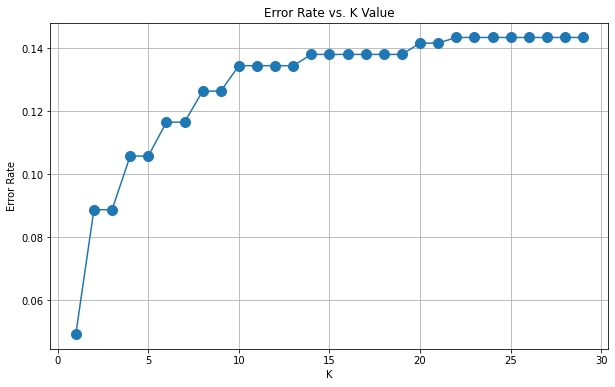

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [21]:
knn = KNeighborsClassifier(n_neighbors=1) # Optimal n_neighbors = 1

knn.fit(scaled_X_train,Y_train)
y_pred_KNN_best = knn.predict(scaled_X_test)

print(confusion_matrix(Y_test, y_pred_KNN_best))
print()
print(classification_report(Y_test, y_pred_KNN_best))

[[951   4]
 [ 51 109]]

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       955
           1       0.96      0.68      0.80       160

    accuracy                           0.95      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115

